#### Подготовка Данных

##### EDA

In [13]:
from pathlib import Path
import pandas as pd

file_path = Path.cwd() / "ml" / "data" / "raw" / "IBM HR Data new.csv"
print("cwd:", Path.cwd())
print("try:", file_path)

if not file_path.exists():
    file_path = Path.cwd().parent / "ml" / "data" / "raw" / "IBM HR Data new.csv"
    print("try2:", file_path)

print("exists:", file_path.exists())

df = pd.read_csv(file_path)
df.shape
df.info()

obj_cols = df.select_dtypes(include="object").columns
num_like = []
for c in obj_cols:
    s = df[c].dropna().astype(str).str.replace(",", ".", regex=False).str.strip()
    share = pd.to_numeric(s, errors="coerce").notna().mean()
    if share > 0.9:
        num_like.append(c)

print("object -> numeric candidates:", num_like)

for c in num_like:
    s = df[c].astype(str).str.replace(",", ".", regex=False).str.strip()
    df[c] = pd.to_numeric(s, errors="coerce")


cwd: /home/pydev/Desktop/courses/AI-project/notebooks
try: /home/pydev/Desktop/courses/AI-project/notebooks/ml/data/raw/IBM HR Data new.csv
try2: /home/pydev/Desktop/courses/AI-project/ml/data/raw/IBM HR Data new.csv
exists: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 

/tmp/ipykernel_37582/1957921897.py:14: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


object -> numeric candidates: ['DistanceFromHome', 'EmployeeCount', 'EmployeeNumber', 'Application ID', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike']


In [14]:
num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(include="object").columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode(dropna=True)[0])


In [15]:
miss_after = (df.isna().mean() * 100).sort_values(ascending=False)
print("top missing after:", miss_after.head(10).to_dict())


top missing after: {'Age': 0.0, 'Attrition': 0.0, 'BusinessTravel': 0.0, 'DailyRate': 0.0, 'Department': 0.0, 'DistanceFromHome': 0.0, 'Education': 0.0, 'EducationField': 0.0, 'EmployeeCount': 0.0, 'EmployeeNumber': 0.0}


In [16]:
df["Attrition"].value_counts(dropna=False)
for col in df.columns:
    print("\n==", col, "==")
    print(df[col].value_counts(dropna=False).head(10))



== Age ==
Age
34.0    1230
35.0    1227
36.0    1109
31.0    1085
29.0    1075
32.0     984
30.0     952
38.0     945
33.0     927
40.0     893
Name: count, dtype: int64

== Attrition ==
Attrition
Current employee         19727
Voluntary Resignation     3709
Name: count, dtype: int64

== BusinessTravel ==
BusinessTravel
Travel_Rarely        16628
Travel_Frequently     4413
Non-Travel            2395
Name: count, dtype: int64

== DailyRate ==
DailyRate
691.0     99
408.0     81
1329.0    80
530.0     79
1082.0    79
329.0     79
427.0     68
334.0     67
950.0     65
1125.0    65
Name: count, dtype: int64

== Department ==
Department
Research & Development    15297
Sales                      7119
Human Resources            1019
1296                          1
Name: count, dtype: int64

== DistanceFromHome ==
DistanceFromHome
2.0     3351
1.0     3335
10.0    1371
3.0     1358
7.0     1346
9.0     1337
8.0     1277
5.0     1036
4.0     1025
6.0      948
Name: count, dtype: int64

== Edu

In [17]:
df = df[df['Department'].isin(['Sales', 'Research & Development', 'Human Resources'])]
df = df[df['EducationField'].isin(['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'])]
df = df[df['Gender'].isin(['Male', 'Female'])]
df = df[df['JobRole'].isin([
    'Sales Executive', 'Research Scientist', 'Laboratory Technician',
    'Manufacturing Director', 'Healthcare Representative', 'Manager',
    'Sales Representative', 'Research Director', 'Human Resources'
])]
df = df[df['MaritalStatus'].isin(['Married','Single','Divorced'])]
df['OverTime'] = df['OverTime'].replace({'Y':'Yes'})
df = df[df['PerformanceRating'].isin([3.0, 4.0])]
df = df[df['StandardHours'] == 80.0]
df = df[df['TrainingTimesLastYear'].between(0,6)]
df = df[df['StockOptionLevel'].between(0,3)]


##### Data preparation

In [6]:
df = pd.read_csv(file_path)
df

/tmp/ipykernel_37582/2812562623.py:1: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1,19344,...,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website
23432,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1,19345,...,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1,16794,...,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1,1956,...,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed


распределение классов

In [21]:
df["target"] = (df["Attrition"] == "Voluntary Resignation").astype(int)

df["target"].value_counts(normalize=True)


target
0    0.841719
1    0.158281
Name: proportion, dtype: float64

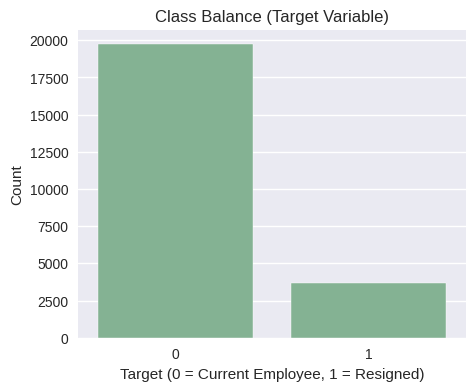

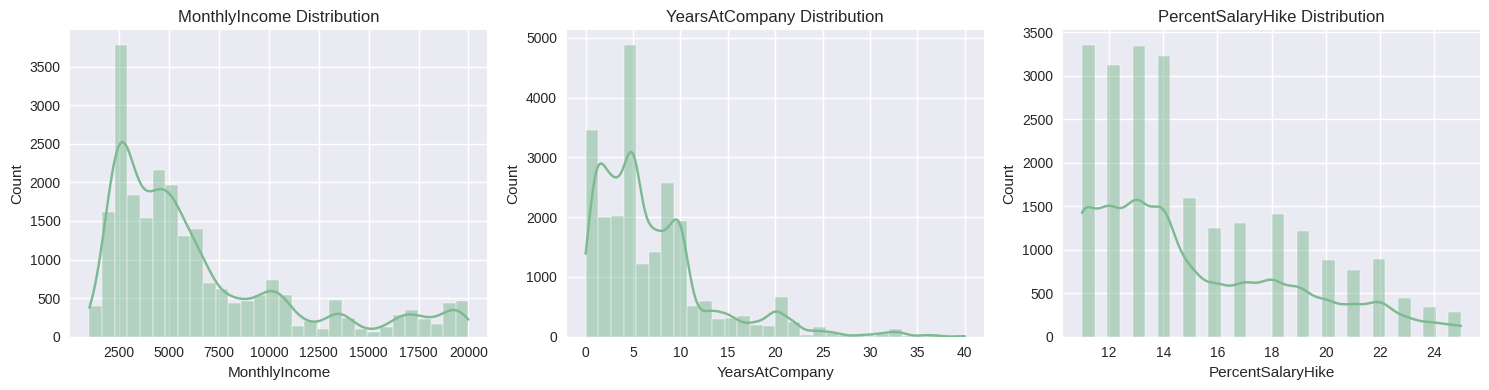

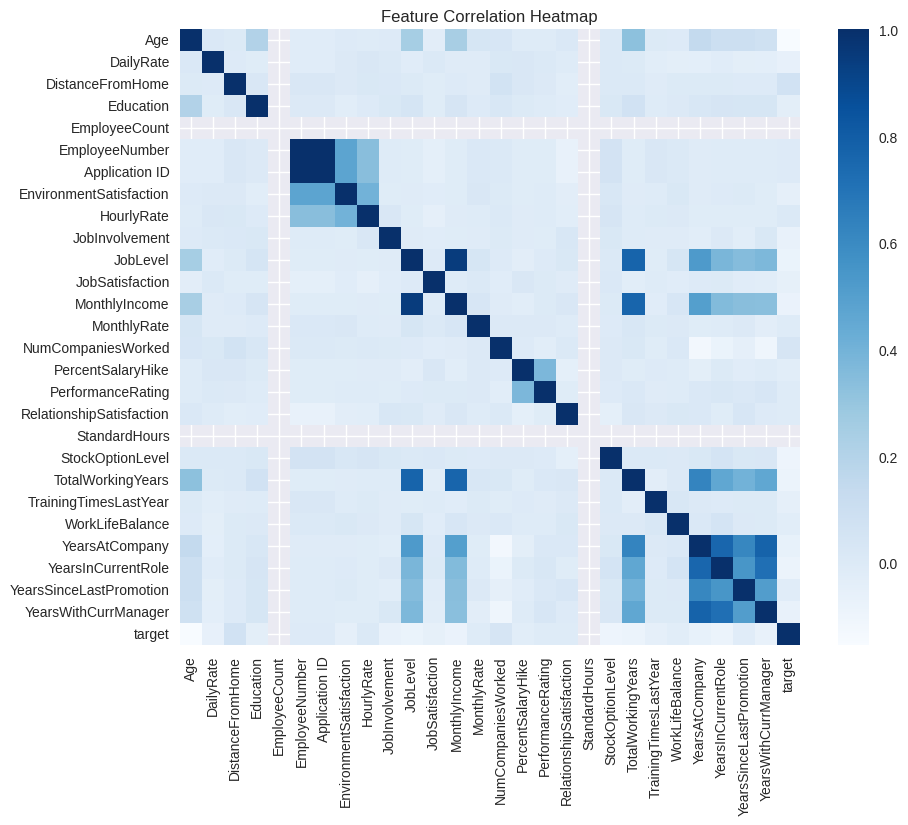

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("crest")

# 1️⃣ Баланс классов
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title('Class Balance (Target Variable)')
plt.xlabel('Target (0 = Current Employee, 1 = Resigned)')
plt.ylabel('Count')
plt.show()

# 2️⃣ Распределение нескольких числовых признаков
num_cols = ['MonthlyIncome', 'YearsAtCompany', 'PercentSalaryHike']

fig, axes = plt.subplots(1, len(num_cols), figsize=(15,4))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# 3️⃣ Корреляции
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()


In [25]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Пример: если есть категориальные признаки
cat_cols = df.select_dtypes(include='object').columns

# Преобразуем текст в числа
df_encoded = df.copy()
for c in cat_cols:
    df_encoded[c] = LabelEncoder().fit_transform(df_encoded[c].astype(str))

# chi2 тест
chi_vals, p_vals = chi2(df_encoded[cat_cols], df_encoded['target'])
chi_results = pd.DataFrame({'feature': cat_cols, 'chi2': chi_vals, 'p-value': p_vals})
chi_results.sort_values('chi2', ascending=False)


,feature,chi2,p-value
0,Attrition,19724.000000,0.000000e+00
8,OverTime,364.212154,3.407329e-81
6,MaritalStatus,152.466761,5.009713e-35
3,EducationField,42.161137,8.405390e-11
5,JobRole,34.537763,4.180615e-09
2,Department,21.005279,4.580197e-06
4,Gender,1.069973,3.009514e-01
9,Employee Source,0.132948,7.153949e-01
1,BusinessTravel,0.043734,8.343500e-01
7,Over18,NaN,NaN


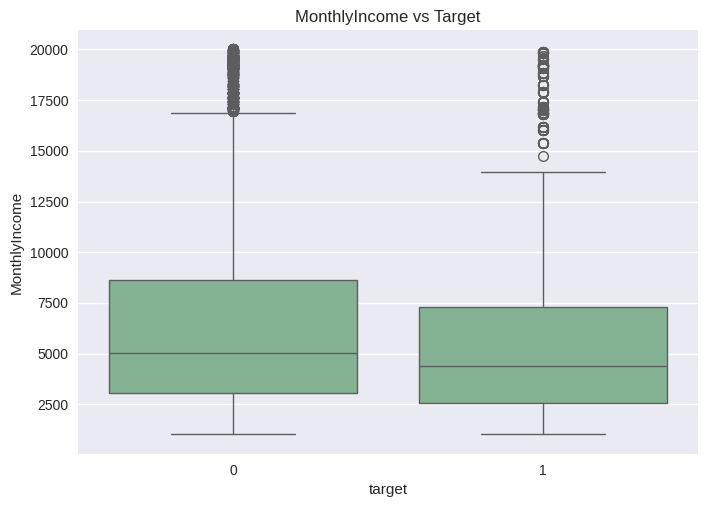

In [26]:
sns.boxplot(x='target', y='MonthlyIncome', data=df)
plt.title('MonthlyIncome vs Target')
plt.show()

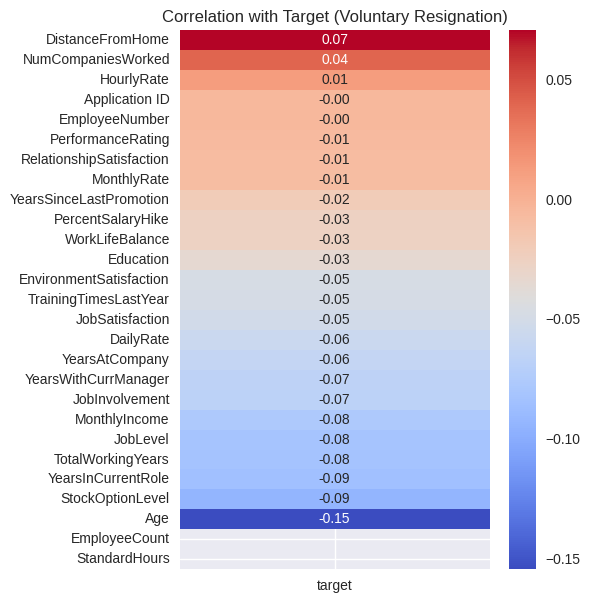

In [30]:
corr = df.corr(numeric_only=True)
target_corr = corr['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(5,7))
sns.heatmap(target_corr.to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation with Target (Voluntary Resignation)')
plt.show()


##### Export: сохранить processed

In [31]:

out = Path("../ml/data/processed/hr_processed.csv")
out.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(out, index=False)

print("saved:", out.resolve())
print("shape:", df.shape)
print("target share:", df["target"].value_counts(normalize=True).to_dict())

saved: /home/pydev/Desktop/courses/AI-project/ml/data/processed/hr_processed.csv
shape: (23433, 38)
target share: {0: 0.8417189433704605, 1: 0.15828105662953953}
